MAX_EXCESS:  4


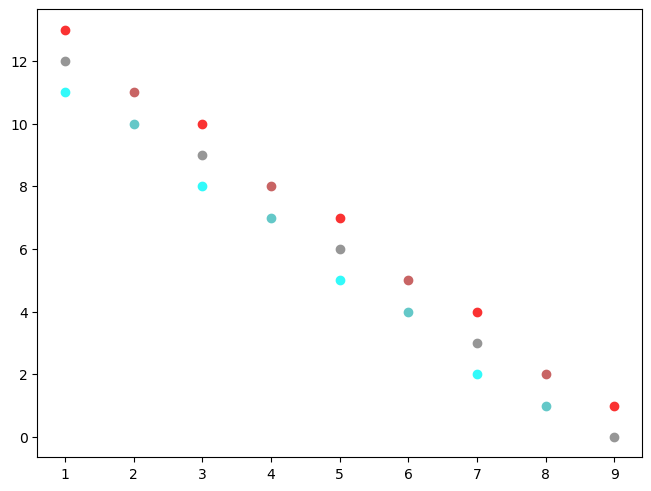

unmarked_components shape:
vertices
0      2
1     28
2     73
3    103
4     64
5     13
dtype: int64
blowup_components shape:
excess  g  odd  
-1      0  True       1
0       0  False      3
1       0  False      8
        1  False      2
2       0  False     19
           True       2
        1  False      1
3       0  False     55
           True       8
        1  False      4
           True       3
4       0  False    168
           True      24
        1  False     18
           True      12
        2  True       1
dtype: int64
relations2_groups size: 
excess  g
1       0     1
2       0     3
        1     1
3       0    10
        1     4
4       0    30
        1    16
        2     1
dtype: int64
blowup_components_basis size: 
excess  g  odd  
0       0  False      2
1       0  False      6
        1  False      1
2       0  False     15
3       0  False     44
        1  False      1
4       0  False    128
        1  False      7
dtype: int64
blowups shape:
excess  partit

In [590]:
import pandas as pd
%run MBELLI_Main.ipynb

In [591]:
#print(blowups[blowups['graph'].apply(lambda G: G.partition == [1,1,1] )].groupby(['vertices']).size())
for row in blowups[blowups['graph'].apply(lambda G: G.crossType == 'A2' and G.partition==(1,2))].itertuples():
    break
    row.graph.show(True)

for row in get_blowups(excess=2,partition=(1,1,1,)).itertuples():
    break
    row.graph.show()


In [ ]:
blowups_virtual = pd.DataFrame(columns=['excess','partition','gn_range','comp_ID_set','unmarkedComp_ID_set','A2Comp_ID_set','crossType','edges_plus_n','graph','specht_sequence'])
# wrapper dataframe for the blowups dataframe to characterize them up to completition by oj_hairs and tripods
# given the excess, the parameter n determines g,vertices, edges, number of oj_hairs and number of tripods of the completed blow up representation in the following way:
#  oj_hairs = n - n_virtual    tripods = (11-ome_virtual-oj_hairs)/3 = 
#  g = g_virtual+2*tripods
#  vertices = vertices_virtual+tripods
#  edges = edges_virtual 3*tripods = edges_virtual + (11-ome_virtual+n_virtual) - n
#  we define   edges_plus_n = edges_virtual + 11-ome_virtual + n_virtual

# this task is grouped by excess and the possible (g,n) pairs corresponding to the excess
# the pair (g,n) determines uniquely which and how many excess 0 components must be appended to obtain a (g,n)-graph when they are glued to the special vertex
for blowup in get_blowups().itertuples():
        blowup.graph.specht_string = r"$V_{1^{n"+("-"+str(blowup.graph.n) if blowup.graph.n!=0 else "")+r"}}$"+(r"$\boxtimes $" if len(blowup.graph.specht_sequence)>0 else "")+blowup.graph.specht_string # ugly, modify directly the attribute of each BlowUpGraph object
        components = list(blowup.graph.components)
        comp_ID_set = [C.ID for C in components]
        comp_ID_set.sort()
        comp_ID_set = tuple(comp_ID_set)
        unmarkedComp_ID_set = [C.unmarkedComponent.ID for C in components]
        while UJ_HAIR.ID in unmarkedComp_ID_set: unmarkedComp_ID_set.remove(UJ_HAIR.ID)
        while UTRIPOD.ID in unmarkedComp_ID_set: unmarkedComp_ID_set.remove(UTRIPOD.ID)
        unmarkedComp_ID_set.sort()
        unmarkedComp_ID_set = tuple(unmarkedComp_ID_set)
        A2Comp_ID_set=None
        if blowup.crossType=='A2':
            A2Comp_ID_set = [C.ID for C in components if not C.crossed] + [C.ID for C in blowup.graph.crossedComponent.crossTypeA2_blowupComponents]
            while OJ_HAIR.ID in A2Comp_ID_set: A2Comp_ID_set.remove(OJ_HAIR.ID)
            while TRIPOD.ID in A2Comp_ID_set: A2Comp_ID_set.remove(TRIPOD.ID)
            A2Comp_ID_set.sort()
            A2Comp_ID_set = tuple(A2Comp_ID_set)
        blowups_virtual.loc[len(blowups_virtual)] = {'graph':blowup.graph,'comp_ID_set':comp_ID_set,'unmarkedComp_ID_set':unmarkedComp_ID_set,'A2Comp_ID_set':A2Comp_ID_set,'crossType':blowup.crossType,'excess':blowup.excess,'partition':blowup.partition,'edges_plus_n': blowup.edges+11-blowup.graph.ome+blowup.n, 'gn_range':blowup.graph.virtual_gn_range, 'specht_sequence': blowup.graph.specht_sequence}
blowups_virtual.sort_values(by=['excess','edges_plus_n','crossType','gn_range','unmarkedComp_ID_set','A2Comp_ID_set'], inplace=True)
blowups_virtual.reset_index(drop=True)
for row in blowups_virtual.itertuples(): row.graph.ID = str(row.Index)
print("blowups_virtual size: ")
print(blowups_virtual.groupby(['excess','edges_plus_n']).size())

blowups_virtual size: 
excess  edges_plus_n
1       10                1
        11                2
2       10                3
        11                9
        12                8
3       10                6
        11               28
        12               48
        13               24
4       10               10
        11               64
        12              165
        13              176
        14               76
dtype: int64


In [593]:
def get_blowups_virtual(excess=None,partition=None,vertices=None,unmarkedComp_ID_set=None,crossType=None, gn=None,edges_plus_n=None):
    frame = blowups_virtual
    conditions = frame['excess']>=0
    if crossType!=None:
        if crossType=='BB': conditions = conditions & (frame['crossType']=='B') | (frame['crossType']=='Birr')
        else: conditions = conditions & (frame['crossType']==crossType)
    if excess!=None: conditions = conditions & (frame['excess']==excess)
    if gn!=None: conditions = conditions & frame['gn_range'].apply(lambda gn_range: gn in gn_range)
    if partition!=None: conditions = conditions & (frame['partition']==partition)
    if vertices!=None: conditions = conditions & (frame['vertices']==vertices)
    if unmarkedComp_ID_set!=None: conditions = conditions & (frame['unmarkedComp_ID_set']==unmarkedComp_ID_set)
    if edges_plus_n!=None: conditions = conditions & (frame['edges_plus_n']==edges_plus_n)
    #if modified!=None: conditions = conditions & (frame)
    return frame[conditions]

for row in get_blowups_virtual(excess=3).itertuples():
    break
    print(f"gn_range: {row.gn_range}   unmarkedComps: {row.unmarkedComp_ID_set}   A2Comps: {row.A2Comp_ID_set}")
    row.graph.show(title=True, specht=True, gn_range=True)
    #for C in row.graph.crossedComponent.crossTypeA2_blowupComponents: C.show()

In [594]:
relations11_groups = pd.DataFrame(columns=['excess','edges_plus_n','unmarkedComp_ID_set','graphs','group_length','crossType'])
# unmarkedComp_ID_set is the sorted tuple of IDs of each unmarked BlowUpComponent object that determines the relation11 group
# graphs is the list of BlowUpGraph objects in case B or Birr that have been generated from the unmarked components with IDs in unmarkedComp_ID_set. It is sorted descendingly w.r.t. the eps_nadd_factor of each BlowUpGraph object

for (excess,edges_plus_n,unmarkedComp_ID_set),group in get_blowups_virtual(crossType='BB').groupby(['excess','edges_plus_n','unmarkedComp_ID_set']):
    if not (group['edges_plus_n']==group.iloc[int(0)].edges_plus_n).all(): raise ValueError('not all blowups in the relation 13 group have same properties')
    graphs = group['graph'].tolist()
    graphs.sort(key=lambda G: G.virtual_gn_range)
    graphs.sort(key=lambda G: G.eps_nadd_factor, reverse=True)
    relations11_groups.loc[len(relations11_groups)] = {'excess':excess,'edges_plus_n':edges_plus_n,'unmarkedComp_ID_set': unmarkedComp_ID_set, 'graphs':graphs, 'crossType':graphs[0].crossType}
relations11_groups['group_length'] = relations11_groups['graphs'].apply(lambda graphs:len(graphs))
relations11_groups['gn_range'] = relations11_groups['graphs'].apply(lambda graphs:graphs[0].virtual_gn_range)
relations11_groups.sort_values(['excess','edges_plus_n','crossType','gn_range','group_length','unmarkedComp_ID_set'],inplace=True)

def get_relations11_groups(excess=None, edges_plus_n=None, gn=None, group_length=None):
    frame = relations11_groups
    conditions = frame['excess']>=0
    if excess!=None: conditions = conditions & (frame['excess']==excess)
    if gn!=None: conditions = conditions & frame['graphs'].apply(lambda graphs: any(gn in G.virtual_gn_range for G in graphs))
    if edges_plus_n!=None: conditions = conditions & (frame['edges_plus_n']==edges_plus_n)
    if group_length!=None:
        if group_length==-1: conditions = conditions & (frame['group_length']>1)
        else: conditions = conditions & (frame['group_length']==group_length)
    return frame[conditions]

print("relations11_groups size: ")
print(relations11_groups.groupby(['excess','edges_plus_n','group_length']).size())

relations11_groups size: 
excess  edges_plus_n  group_length
1       11            1                2
2       11            1                5
        12            1                6
3       11            1               11
        12            1               22
                      3                2
        13            1               16
4       11            1               19
        12            1               60
                      4                5
        13            1               74
                      3                1
                      4                5
        14            1               46
dtype: int64


In [595]:
relations13_groups = pd.DataFrame(columns=['excess','edges_plus_n','A2Comp_ID_set','graphs'])
# A2Comp_ID_set is the sorted tuple of IDs of each marked BlowUpComponent object that determines the relation13 group
# graphs is the list of BlowUpGraph objects in case A2 whose further blowup at the special vertex results in the marked components with IDs in A2Comp_ID_set.  It is sorted descendingly w.r.t. the eps_nadd_factor of each BlowUpGraph object, and ascendingly w.r.t. the amount o hairs on the crossed component.

for (excess,edges_plus_n,A2Comp_ID_set),group in get_blowups_virtual(crossType='A2').groupby(['excess','edges_plus_n','A2Comp_ID_set']):
    if not (group['edges_plus_n']==group.iloc[int(0)].edges_plus_n).all(): raise ValueError('not all blowups in the relation 13 group have same properties')
    graphs = group['graph'].tolist()
    graphs.sort(key=lambda G: G.virtual_gn_range)
    graphs.sort(key=lambda G: G.eps_nadd_factor, reverse=True)
    graphs.sort(key=lambda G: G.crossedComponent.nadd)
    graphs.sort(key=lambda G: len(G.components))
    relations13_groups.loc[len(relations13_groups)] = {'graphs':graphs, 'excess':excess, 'edges_plus_n':edges_plus_n, 'A2Comp_ID_set':A2Comp_ID_set}

relations13_groups['group_length'] = relations13_groups['graphs'].apply(lambda graphs:len(graphs))
relations13_groups.sort_values(['excess','edges_plus_n','group_length','A2Comp_ID_set'],inplace=True)

def get_relations13_groups(excess=None, edges_plus_n=None, gn=None):
    frame = relations13_groups
    conditions = frame['excess']>=0
    if excess!=None: conditions = conditions & (frame['excess']==excess)
    if gn!=None: conditions = conditions & frame['graphs'].apply(lambda graphs: any(gn in G.virtual_gn_range for G in graphs))
    if edges_plus_n!=None: conditions = conditions & (frame['edges_plus_n']==edges_plus_n)
    return frame[conditions]

print("relations13_groups size: ")
print(relations13_groups.groupby(['excess','edges_plus_n','group_length']).size())

relations13_groups size: 
excess  edges_plus_n  group_length
2       12            2               1
3       12            4               2
        13            4               2
4       12            4               3
                      7               1
        13            2               1
                      4               2
                      7               5
        14            3               1
                      4               2
                      5               1
                      7               2
dtype: int64


In [596]:
for row in relations11_groups[relations11_groups['graphs'].apply(lambda graphs: len(graphs)>0 and graphs[0].excess==2)].itertuples():
    break
    print("unmarkedComp_ID_set: ", row.unmarkedComp_ID_set)
    for G in row.graphs: G.show()

for row in relations13_groups[relations13_groups['graphs'].apply(lambda graphs: len(graphs)>0 and graphs[0].excess==3)].itertuples():
    break
    print("A2Comp_ID_set: ", row.A2Comp_ID_set)
    for G in row.graphs: G.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams['figure.constrained_layout.use'] = True

window_width = 8.5
blowup_per_row = 4
blowup_width = (window_width-1)/4
blowup_height = 1.3
window_height_buffer = 0.6
w_pad = 0.1
wspace = 0
h_pad = 0.2

def save_virtual(excess,check_edges=None):
    pdf = PdfPages(f'Records/Excess{excess}/VirtualBlowups_excess{excess}.pdf')
    gn_string=""
    for gn in gn_table[excess]: gn_string+= ("" if len(gn_string)==0 else ", ") + str(gn)

    excess_group = get_blowups_virtual(excess=excess)

    excess_title = f'--------------     excess: {excess}      (g,n): {gn_string}       graphs: {len(excess_group)}     --------------\n'
    first_group = True

    for edges_plus_n,edge_group in excess_group.groupby('edges_plus_n'):
        if check_edges!=None and edges_plus_n!=check_edges: continue

        edge_title = (excess_title if first_group else "") + f'---------     edges: {edges_plus_n}-n       graphs: {len(edge_group)}      ---------\n'
        print(edge_title)
        first_group=False
        first_edge_group = True

        amount = (edge_group['crossType']=='A').sum()
        if amount!=0:
            graphics = []
            count=0
            for row in edge_group[edge_group['crossType']=='A'].itertuples():
                if count%blowup_per_row==0: graphics.append([])
                graphics[-1].append(row.graph.show(title=True,gn_range=True,specht=True,graphics=True))
                count+=1
            while len(graphics[-1])%blowup_per_row!=0:
                graphics[-1].append(text(' ',(0,0),axes=False))

            title = (edge_title if first_edge_group else "") + f"---  A3 case      graphs: {(edge_group['crossType']=='A').sum()}  ---"
            fig = plt.figure()
            fig.suptitle(title,fontsize=10)
            fig.set_size_inches(window_width,blowup_height*len(graphics)+window_height_buffer*(2 if first_edge_group else 1))
            fig.get_layout_engine().set(w_pad=w_pad, h_pad=h_pad,wspace=wspace)
            first_edge_group = False
            graphics_array(graphics).matplotlib(figure=fig)
            pdf.savefig(fig)
            plt.close()

        amount = len(get_relations13_groups(excess=excess,edges_plus_n=edges_plus_n))
        if amount!=0:
            graphics = []
            count=0
            for rel13group in relations13_groups[(relations13_groups['excess']==excess) & (relations13_groups['edges_plus_n']==edges_plus_n)].itertuples():
                #if count!=0: graphics.append([text(' ',(0,0),axes=False)]*blowup_per_row) # buffer space between relation groups
                for G in rel13group.graphs:
                    if count%blowup_per_row==0: graphics.append([])
                    graphics[-1].append(G.show(title=True,gn_range=True,specht=True,graphics=True))
                    count+=1
                while count%blowup_per_row!=0:
                    graphics[-1].append(text(' ',(0,0),axes=False))
                    count+=1

            title = (edge_title if first_edge_group else "") + f"--- A2 case with weight 13 relations      relation groups: {amount} ---"
            fig = plt.figure()
            fig.suptitle(title,fontsize=10)
            fig.set_size_inches(window_width,blowup_height*len(graphics)+window_height_buffer*(2 if first_edge_group else 1))
            fig.get_layout_engine().set(w_pad=w_pad, h_pad=h_pad,wspace=wspace)
            first_edge_group = False
            graphics_array(graphics).matplotlib(figure=fig)
            pdf.savefig(fig)
            plt.close()

        amount1 = len(get_relations11_groups(excess=excess,edges_plus_n=edges_plus_n,group_length=1))
        if amount1!=0:
            graphics = []
            count=0
            for rel11group in get_relations11_groups(excess=excess,edges_plus_n=edges_plus_n,group_length=1).itertuples():
                if count%blowup_per_row==0: graphics.append([])
                graphics[-1].append(rel11group.graphs[0].show(title=True,gn_range=True,specht=True,graphics=True))
                count+=1
            while len(graphics[-1])%blowup_per_row!=0:
                graphics[-1].append(text(' ',(0,0),axes=False))

            title = (edge_title if first_edge_group else "") + f"--- B,Birr cases without weight 11 relations      graphs: {amount1} ---"
            fig = plt.figure()
            fig.suptitle(title,fontsize=10)
            fig.set_size_inches(window_width,blowup_height*len(graphics)+window_height_buffer*(2 if first_edge_group else 1))
            fig.get_layout_engine().set(w_pad=w_pad, h_pad=h_pad,wspace=wspace)
            first_edge_group = False
            graphics_array(graphics).matplotlib(figure=fig)
            pdf.savefig(fig)
            plt.close()

        amount = len(get_relations11_groups(excess=excess,edges_plus_n=edges_plus_n))
        if amount-amount1!=0:
            graphics = []
            count=0
            for rel11group in get_relations11_groups(excess=excess,edges_plus_n=edges_plus_n,group_length=-1).itertuples():
                #if count!=0: graphics.append([text(' ',(0,0),axes=False)]*blowup_per_row) # buffer space between relation groups
                for G in rel11group.graphs:
                    if count%blowup_per_row==0: graphics.append([])
                    graphics[-1].append(G.show(title=True,gn_range=True,specht=True,graphics=True))
                    count+=1
                while count%blowup_per_row!=0:
                    graphics[-1].append(text(' ',(0,0),axes=False))
                    count+=1
                    
            title = (edge_title if first_edge_group else "") + f"--- B,Birr cases with weight 11 relations     relation groups: {amount-amount1} ---"
            fig = plt.figure()
            fig.suptitle(title,fontsize=10)
            fig.set_size_inches(window_width,blowup_height*len(graphics)+window_height_buffer*(2 if first_edge_group else 1))
            fig.get_layout_engine().set(w_pad=w_pad, h_pad=h_pad,wspace=wspace)
            first_edge_group = False
            graphics_array(graphics).matplotlib(figure=fig)
            pdf.savefig(fig)
            plt.close()
    pdf.close()

for e in range(1,5): save_virtual(e)

--------------     excess: 1      (g,n): (2, 10), (4, 7), (6, 4), (8, 1)       graphs: 3     --------------
---------     edges: 10-n       graphs: 1      ---------

---------     edges: 11-n       graphs: 2      ---------

--------------     excess: 2      (g,n): (1, 12), (3, 9), (5, 6), (7, 3), (9, 0)       graphs: 20     --------------
---------     edges: 10-n       graphs: 3      ---------

---------     edges: 11-n       graphs: 9      ---------

---------     edges: 12-n       graphs: 8      ---------

--------------     excess: 3      (g,n): (2, 11), (4, 8), (6, 5), (8, 2)       graphs: 106     --------------
---------     edges: 10-n       graphs: 6      ---------

---------     edges: 11-n       graphs: 28      ---------

---------     edges: 12-n       graphs: 48      ---------

---------     edges: 13-n       graphs: 24      ---------

--------------     excess: 4      (g,n): (1, 13), (3, 10), (5, 7), (7, 4), (9, 1)       graphs: 491     --------------
---------     edges: 

In [598]:
blowup_width = 2.5
blowup_height = 1
blowup_per_row = 4
window_width = blowup_per_row*blowup_width+0.2

def print_virtual(excess):
    excess_group = get_blowups_virtual(excess=excess)
    for edges_plus_n,edge_group in excess_group.groupby('edges_plus_n'):
        print(f'---------------- excess: {excess}   edges: {edges_plus_n}-n    amount: {len(edge_group)} ----------------')

        amount = (edge_group['crossType']=='A').sum()
        if amount!=0:
            print(f"Case A3    amount: {(edge_group['crossType']=='A').sum()}")
            graphics = []
            count=0
            for row in edge_group[edge_group['crossType']=='A'].itertuples():
                if count%blowup_per_row==0:
                    if len(graphics)!=0:
                        graphics_array(graphics).show(figsize=[window_width,len(graphics)*blowup_height])
                        graphics=[]
                    graphics.append([])
                graphics[-1].append(row.graph.show(title=True,gn_range=True,graphics=True))
                count+=1
            while count>blowup_per_row and count%blowup_per_row!=0:
                graphics[-1].append(text('            ',(0,0),axes=False))
                count+=1
            graphics_array(graphics).show(figsize=[window_width,len(graphics)*blowup_height])
            
        amount = ((relations13_groups['excess']==excess) & (relations13_groups['edges_plus_n']==edges_plus_n)).sum()
        amount1 = ((relations13_groups['excess']==excess) & (relations13_groups['edges_plus_n']==edges_plus_n) & (relations13_groups['group_length']==1)).sum()
        if amount!=0:  print(f"Case A2 with weight 13 relations       relation groups: {amount}")
        for rel13group in relations13_groups[(relations13_groups['excess']==excess) & (relations13_groups['edges_plus_n']==edges_plus_n)].itertuples():
            #break
            graphics = []
            count=0
            for G in rel13group.graphs:
                if count%blowup_per_row==0: graphics.append([])
                graphics[-1].append(G.show(title=True,gn_range=True,graphics=True))
                count+=1
            while count>blowup_per_row and count%blowup_per_row!=0:
                graphics[-1].append(text('            ',(0,0),axes=False))
                count+=1
            graphics_array(graphics).show(figsize=[min(window_width,count*blowup_width),len(graphics)*blowup_height])

        amount = ((relations11_groups['excess']==excess) & (relations11_groups['edges_plus_n']==edges_plus_n)).sum()
        amount1 = ((relations11_groups['excess']==excess) & (relations11_groups['edges_plus_n']==edges_plus_n) & (relations11_groups['group_length']==1)).sum()
        if amount1!=0:
            print(f"Cases B,Birr without weight 11 relations      amount: {amount1}")
            graphics = []
            count=0
            for rel11group in relations11_groups[(relations11_groups['excess']==excess) & (relations11_groups['edges_plus_n']==edges_plus_n) & (relations11_groups['group_length']==1)].itertuples():
                if count%blowup_per_row==0:
                    if len(graphics)!=0:
                        graphics_array(graphics).show(figsize=[window_width,len(graphics)*blowup_height])
                        graphics=[]
                    graphics.append([])
                graphics[-1].append(rel11group.graphs[0].show(title=True,gn_range=True,graphics=True))
                count+=1
            while count>blowup_per_row and count%blowup_per_row!=0:
                graphics[-1].append(text('            ',(0,0),axes=False))
                count+=1
            graphics_array(graphics).show(figsize=[min(window_width,count*blowup_width),len(graphics)*blowup_height])
        if amount-amount1!=0:
            print(f"Cases B,Birr with weight 11 relations       relation groups: {amount-amount1}")
            for rel11group in relations11_groups[(relations11_groups['excess']==excess) & (relations11_groups['edges_plus_n']==edges_plus_n) & (relations11_groups['group_length']>1)].itertuples():
                #break
                graphics = []
                count=0
                for G in rel11group.graphs:
                    if count%blowup_per_row==0: graphics.append([])
                    graphics[-1].append(G.show(title=True,gn_range=True,graphics=True))
                    count+=1
                while count>blowup_per_row and count%blowup_per_row!=0:
                    graphics[-1].append(text('             ',(0,0),axes=False))
                    count+=1
                graphics_array(graphics).show(figsize=[min(window_width,count*blowup_width),len(graphics)*blowup_height])
        
        print("  ")
#print_virtual(3)

In [599]:
blowups_complete = pd.DataFrame(columns=['excess','partition','g','n','crossType','vertices','edges','graph','specht_sequence','oj_hairs','tripods'])
# completions of virtual blowups to an actual blowup representation for every g,n tuple in its gn_range

for blowup in blowups_virtual.itertuples():
    blowup.graph.gn_completions = {}
    for (g,n) in blowup.gn_range:
        oj_hairs = n-blowup.graph.n
        tripods = ((g-blowup.graph.g)/2)
        if 11!=3*tripods+blowup.graph.ome+oj_hairs: raise ValueError("mismatch in number of omega hairs of completion")
        components = [OJ_HAIR for x in range(oj_hairs)] + [TRIPOD for x in range(tripods)]
        components = components + list(blowup.graph.components)
        G = BlowUpGraph(components)
        if G.edges!=blowup.edges_plus_n-n: raise ValueError("mismatch in number of edges of completion")
        G.ID = blowup.graph.ID # inherit the ID of the virtual blowup, as it is unique for every (g,n) pair
        blowup.graph.gn_completions[g]=G
        blowups_complete.loc[len(blowups_complete)] = {'graph':G,'crossType':G.crossType,'excess':blowup.excess,'partition':G.partition,'g':g,'n':n,'vertices':G.vertices,'edges':G.edges,'oj_hairs':oj_hairs,'tripods':tripods,'specht_sequence':G.specht_sequence}
blowups_complete.sort_values(by=['excess','g','n','edges','crossType','vertices'], inplace=True)
blowups_complete.reset_index(drop=True)
print("blowups_complete size: ")
print(blowups_complete.groupby(['excess','g','n']).size())

blowups_complete size: 
excess  g  n 
1       2  10      1
        4  7       3
        6  4       3
        8  1       3
2       1  12      1
        3  9       6
        5  6      16
        7  3      20
        9  0      13
3       2  11      9
        4  8      40
        6  5      84
        8  2     105
4       1  13      5
        3  10     56
        5  7     209
        7  4     393
        9  1     365
dtype: int64


In [606]:
def get_blowups_complete(excess=None,partition=None,vertices=None,crossType=None, gn=None):
    frame = blowups_complete
    conditions = frame['excess']>=0
    if crossType!=None:
        if crossType=='BB': conditions = conditions & (frame['crossType']=='B') | (frame['crossType']=='Birr')
        else: conditions = conditions & (frame['crossType']==crossType)
    if excess!=None: conditions = conditions & (frame['excess']==excess)
    if gn!=None: conditions = conditions & (frame['g']==gn[0]) & (frame['n']==gn[1])
    if partition!=None: conditions = conditions & (frame['partition']==partition)
    if vertices!=None: conditions = conditions & (frame['vertices']==vertices)
    return frame[conditions]

# compute euler characteristic, WITHOUT TAKING CARE OF WEIGHT 13 AND 11 RELATIONS
def EulerCharacteristic(g,n):
    excess_group = get_blowups_virtual(gn=(g,n))
    contributions = pd.DataFrame(columns=['edges','V0','V1','V2','V11','V1xV1','V1xV1xV1','V1xV2','V1xV11','V3','V111'])
    for row in excess_group.itertuples():
        l = len(row.specht_sequence)
        V1 = row.specht_sequence.count((1,1))
        V2 = row.specht_sequence.count((2,1))
        V11 = row.specht_sequence.count((2,-1))
        V3 = row.specht_sequence.count((3,1))
        V111 = row.specht_sequence.count((3,-1))
        if V1+V2+V11+V3+V111!=l:
            print(row.specht_sequence)
            raise ValueError("unhandeled specht contribution")
        
        contributions.loc[len(contributions)] = {'edges':row.edges_plus_n-n, 'V0':1 if l==0 else 0, 'V1':V1 if l==1 else 0, 'V2':V2 if l==1 else 0, 'V11':V11 if l==1 else 0, 'V1xV1':1 if (V1==2 and l==2) else 0, 'V1xV1xV1':1 if (V1==3 and l==3) else 0, 'V1xV2': 1 if (V1==1 and V2==1 and l==2) else 0, 'V1xV11': 1 if (V1==1 and V11==1 and l==2) else 0, 'V3': V3 if l==1 else 0, 'V111': V111 if l==1 else 0 }
    # alternating sum of all the specht module contributions. sign -1 when the degree 13 + edges = 13 + edges_plus_n - n is odd
    for edges_plus_n,edge_group in excess_group.groupby('edges_plus_n'):
        contributions[contributions['edges']==edges_plus_n-n] = contributions[contributions['edges']==edges_plus_n-n].mul( 1 if (edges_plus_n-n)%2!=0 else -1 )
    summed =  contributions[['V0','V1','V2','V11','V1xV1','V1xV1xV1','V1xV2','V1xV11','V3','V111']].sum(axis=0)

    specht_string=""
    if summed.V0!=0: specht_string += r"$"+str(summed.V0)+r"$"+specht_sequence_to_string([(n,-1 if n>1 else 1)])
    if summed.V1!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V1>=0 else "")+str(summed.V1)+r"$"+specht_sequence_to_string([(n-1,-1 if n-1>1 else 1),(1,1)])
    if summed.V2!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V2>=0 else "")+str(summed.V2)+r"$"+specht_sequence_to_string([(n-2,-1 if n-2>1 else 1),(2,1)])
    if summed.V11!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V11>=0 else "")+str(summed.V11)+r"$"+specht_sequence_to_string([(n-2,-1 if n-2>1 else 1),(2,-1)])
    if summed.V1xV1!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V1xV1>=0 else "")+str(summed.V1xV1)+r"$"+specht_sequence_to_string([(n-2,-1 if n-2>1 else 1),(1,1),(1,1)])
    if summed.V3!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V3>=0 else "")+str(summed.V3)+r"$"+specht_sequence_to_string([(n-3,-1 if n-3>1 else 1),(3,1)])
    if summed.V111!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V111>=0 else "")+str(summed.V111)+r"$"+specht_sequence_to_string([(n-3,-1 if n-3>1 else 1),(3,-1)])
    if summed.V1xV2!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V1xV2>=0 else "")+str(summed.V1xV2)+r"$"+specht_sequence_to_string([(n-3,-1 if n-3>1 else 1),(1,1),(2,1)])
    if summed.V1xV11!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V1xV11>=0 else "")+str(summed.V1xV11)+r"$"+specht_sequence_to_string([(n-3,-1 if n-3>1 else 1),(1,1),(2,-1)])
    if summed.V1xV1xV1!=0: specht_string += r"$"+("+" if len(specht_string)!=0 and summed.V1xV1xV1>=0 else "")+str(summed.V1xV1xV1)+r"$"+specht_sequence_to_string([(n-3,-1 if n-3>1 else 1),(1,1),(1,1),(1,1)])
    return specht_string

(g,n)=(6,5)
for row in get_blowups_virtual(gn=(g,n), crossType='A2').itertuples():
    break
    row.graph.gn_completions[g].show(title=True, specht=True)
print(EulerCharacteristic(g,n))

$2$$V_{1^{5}}$$+4$$V_{1^{4}}\boxtimes V_{1}$$-1$$V_{1^{3}}\boxtimes V_{2}$$-2$$V_{1^{3}}\boxtimes V_{1}\boxtimes V_{1}$$-1$$V_{1^{2}}\boxtimes V_{1}\boxtimes V_{2}$


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['figure.constrained_layout.use'] = True

window_width = 8.5
blowup_per_row = 4
blowup_height = 1.3
window_height_buffer = 0.6
w_pad = 0.1
wspace = 0
h_pad = 0.2

def save_complete(g,n,check_edges=None):
    excess = 3*g-3+2*n-22
    gn_group = get_blowups_complete(gn=(g,n))
    pdf = PdfPages(f'Records/Excess{excess}/CompletedBlowups_({g},{n}).pdf')

    EulerChar = EulerCharacteristic(g,n)
    excess_title = f'----------    g,n: {g},{n}       graphs: {len(gn_group)}    ----------'
    if len(EulerChar)>90: excess_title+= f"  Euler Characteristic (without resolving relations): \n---------   {EulerChar}   ---------\n"
    else:  excess_title += f'\n------ Euler Characteristic (without resolving relations):   {EulerChar}  ------\n'
    first_group = True

    for edges,edge_group in gn_group.groupby('edges'):
        if check_edges!=None and edges!=check_edges: continue

        edge_title= (excess_title if first_group else "") + f'---------     edges: {edges}      graphs: {len(edge_group)}      ---------\n'
        print(edge_title)
        first_group=False
        first_edge_group = True

        amount = (edge_group['crossType']=='A').sum()
        if amount!=0:
            graphics = []
            count=0
            for row in edge_group[edge_group['crossType']=='A'].itertuples():
                if count%blowup_per_row==0: graphics.append([])
                graphics[-1].append(row.graph.show(title=True,specht=True,graphics=True))
                count+=1
            while len(graphics[-1])%blowup_per_row!=0:
                graphics[-1].append(text(' ',(0,0),axes=False))

            title = (edge_title if first_edge_group else "") + f"-------  A3 case       graphs: {(edge_group['crossType']=='A').sum()}  -------"
            fig = plt.figure()
            fig.suptitle(title, fontsize=10)
            fig.set_size_inches(window_width,blowup_height*len(graphics)+window_height_buffer*(2 if first_edge_group else 1))
            fig.get_layout_engine().set(w_pad=w_pad, h_pad=h_pad,wspace=wspace)
            first_edge_group = False
            graphics_array(graphics).matplotlib(figure=fig)
            pdf.savefig(fig)
            plt.close()

        amount = len(get_relations13_groups(excess,edges+n,(g,n)))
        if amount!=0:
            graphics = []
            count=0
            for rel13group in relations13_groups[(relations13_groups['excess']==excess) & (relations13_groups['edges_plus_n']==edges+n)].itertuples():
                #if count!=0: graphics.append([text(' ',(0,0),axes=False)]*blowup_per_row) # buffer space between relation groups
                for G in rel13group.graphs:
                    if (g,n) in G.virtual_gn_range:
                        if count%blowup_per_row==0: graphics.append([])
                        graphics[-1].append(G.gn_completions[g].show(title=True,specht=True,graphics=True))
                        count+=1
                while count%blowup_per_row!=0:
                    graphics[-1].append(text(' ',(0,0),axes=False))
                    count+=1

            title = (edge_title if first_edge_group else "") + f"------- A2 case with weight 13 relations       relation groups: {amount} -------"
            fig = plt.figure()
            fig.suptitle(title, fontsize=10)
            fig.set_size_inches(window_width,blowup_height*len(graphics)+window_height_buffer*(2 if first_edge_group else 1))
            fig.get_layout_engine().set(w_pad=w_pad, h_pad=h_pad,wspace=wspace)
            first_edge_group = False
            graphics_array(graphics).matplotlib(figure=fig)
            pdf.savefig(fig)
            plt.close()

        amount1 = len(get_relations11_groups(excess,edges+n,(g,n),1))
        if amount1!=0:
            graphics = []
            count=0
            for rel11group in get_relations11_groups(excess,edges+n,(g,n),1).itertuples():
                if (g,n) in rel11group.graphs[0].virtual_gn_range:
                    if count%blowup_per_row==0: graphics.append([])
                    graphics[-1].append(rel11group.graphs[0].gn_completions[g].show(title=True,specht=True,graphics=True))
                    count+=1
            while len(graphics[-1])%blowup_per_row!=0:
                graphics[-1].append(text(' ',(0,0),axes=False))

            title = (edge_title if first_edge_group else "") + f"-------  B,Birr cases without weight 11 relations       graphs: {amount1}  -------"
            fig = plt.figure()
            fig.suptitle(title, fontsize=10)
            fig.set_size_inches(window_width,blowup_height*len(graphics)+window_height_buffer*(2 if first_edge_group else 1))
            fig.get_layout_engine().set(w_pad=w_pad, h_pad=h_pad,wspace=wspace)
            first_edge_group = False
            graphics_array(graphics).matplotlib(figure=fig)
            pdf.savefig(fig)
            plt.close()

        amount = len(get_relations11_groups(excess,edges+n,(g,n)))
        if amount-amount1!=0:
            graphics = []
            count=0
            for rel11group in get_relations11_groups(excess,edges+n,(g,n),group_length=-1).itertuples():
                #if count!=0: graphics.append([text(' ',(0,0),axes=False)]*blowup_per_row) # buffer space between relation groups
                for G in rel11group.graphs:
                    if (g,n) in G.virtual_gn_range:
                        if count%blowup_per_row==0: graphics.append([])
                        graphics[-1].append(G.gn_completions[g].show(title=True,specht=True,graphics=True))
                        count+=1
                while count%blowup_per_row!=0:
                    graphics[-1].append(text(' ',(0,0),axes=False))
                    count+=1

            title = (edge_title if first_edge_group else "") + f"-------  B,Birr cases with weight 11 relations        relation groups: {amount-amount1}  -------"
            fig = plt.figure()
            fig.suptitle(title, fontsize=10)
            fig.set_size_inches(window_width,blowup_height*len(graphics)+window_height_buffer*(2 if first_edge_group else 1))
            fig.get_layout_engine().set(w_pad=w_pad, h_pad=h_pad,wspace=wspace)
            first_edge_group = False
            graphics_array(graphics).matplotlib(figure=fig)
            pdf.savefig(fig)
            plt.close()
    pdf.close()

for (g,n) in gn_table[4]:
    #break
    save_complete(g,n)

----------    g,n: 1,13       graphs: 5    ----------
------ Euler Characteristic (without resolving relations):   $-1$$V_{1^{10}}\boxtimes V_{3}$$+1$$V_{1^{10}}\boxtimes V_{1}\boxtimes V_{2}$  ------
---------     edges: 0      graphs: 2      ---------

---------     edges: 1      graphs: 3      ---------

----------    g,n: 3,10       graphs: 56    ----------  Euler Characteristic (without resolving relations): 
---------   $-2$$V_{1^{10}}$$-1$$V_{1^{8}}\boxtimes V_{1^{2}}$$+3$$V_{1^{8}}\boxtimes V_{1}\boxtimes V_{1}$$+1$$V_{1^{7}}\boxtimes V_{3}$$-2$$V_{1^{7}}\boxtimes V_{1}\boxtimes V_{2}$$-1$$V_{1^{7}}\boxtimes V_{1}\boxtimes V_{1}\boxtimes V_{1}$   ---------
---------     edges: 2      graphs: 9      ---------

---------     edges: 3      graphs: 26      ---------

---------     edges: 4      graphs: 21      ---------

----------    g,n: 5,7       graphs: 209    ----------  Euler Characteristic (without resolving relations): 
---------   $6$$V_{1^{7}}$$+1$$V_{1^{6}}\boxtimes V_{1